### bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### importação dos dados

In [3]:
path = r"D:\UFPR\2º Semestre 2021\Estatística Econômica e Introdução à Econometria\1. Relatório Enade\2018\3.DADOS\microdados_enade_2018.txt"
enade = pd.read_table(path, sep=';', decimal=',')

### Amostragem e Tratamento

#### Variáveis Selecionadas

In [4]:
economia = enade.where(enade.CO_GRUPO==13).filter([
    'QE_I04',               # Nível de educação do pai
    'QE_I05',               # Nível de educação da mãe
    'QE_I07',               # Quantas pessoas moram com você
    'QE_I08',               # Renda familiar total
    'QE_I09',               # Situação responsável (responsável pela renda)
    'QE_I10',               # Situação de trabalho (horas de trabalho)
    'QE_I23',               # Horas por semana
    'NT_GER'                # Nota Geral
]).dropna()

#### Transformação de variáveis categóricas para numéricas

In [5]:
dict_escolaridade_pais = {
"A": 0,
"B": 1,
"C": 2,
"D": 3,
"E": 4,
"F": 5
}

In [6]:
economia['QE_I04'] = [dict_escolaridade_pais[resp] for resp in economia.QE_I04] #substitui os valores pelo nome da regiao

In [7]:
economia['QE_I05'] = [dict_escolaridade_pais[resp] for resp in economia.QE_I05] #substitui os valores pelo nome da regiao

In [9]:
dict_pessoas_moram = {
    "A": 0,
    "B": 1,
    "C": 2,
    "D": 3,
    "E": 4,
    "F": 5,
    "G": 6,
    "H": 7,
}

In [10]:
economia['QE_I07'] = [dict_pessoas_moram[resp] for resp in economia.QE_I07] #substitui as letras pelo numero de pessoas

In [12]:
dict_renda_familiar = {
    "A": 1500,
    "B": 2250,
    "C": 3750,
    "D": 5250,
    "E": 8000,
    "F": 20000,
    "G": 30000,
}

In [17]:
economia['QE_I08'] = [dict_renda_familiar[resp] for resp in economia.QE_I08] #substitui as letras pelo salário médio da faixa correspondente

In [19]:
dict_responsavel_renda = {
    "A": 0,
    "B": 1,
    "C": 2,
    "D": 3,
    "E": 4,
    "F": 5
}

In [20]:
economia['QE_I09'] = [dict_responsavel_renda[resp] for resp in economia.QE_I09] #substitui as letras pelo situação financeira da faixa correspondente

In [23]:
dict_horas_trabalho = {
    "A": 0,
    "B": 10,
    "C": 20,
    "D": 30,
    "E": 40,
}

In [24]:
economia['QE_I10'] = [dict_horas_trabalho[resp] for resp in economia.QE_I10] #substitui as letras pelo número de ho

In [27]:
dict_horas_estudo = {
    "A": 0,
    "B": 2,
    "C": 5.5,
    "D": 10,
    "E": 12,
}

In [31]:
economia['QE_I23'] = [dict_horas_estudo[resp] for resp in economia.QE_I23] #substitui as letras pelo número de horas de estudo médio

In [36]:
economia

,QE_I04,QE_I05,QE_I07,QE_I08,QE_I09,QE_I10,QE_I23,NT_GER
160,3,3,2,3750,5,40,5.5,24.9
161,3,1,2,5250,4,40,2.0,25.6
162,3,3,2,3750,2,40,5.5,48.7
163,1,2,3,2250,4,40,2.0,35.7
164,1,3,1,2250,4,40,5.5,33.9
...,...,...,...,...,...,...,...,...
546659,4,4,5,20000,4,40,2.0,40.9
547633,3,4,1,1500,1,0,2.0,32.2
547634,4,3,1,3750,3,20,10.0,27.8
547635,0,2,2,1500,5,30,2.0,30.2


## Matriz de Correlação

In [67]:
dummies_ensino = pd.get_dummies(economia.QE_I17)
dummies_ensino

,A,B,C,D,E,F
160,1,0,0,0,0,0
161,0,0,0,1,0,0
162,0,0,0,1,0,0
163,1,0,0,0,0,0
164,0,1,0,0,0,0
...,...,...,...,...,...,...
546659,1,0,0,0,0,0
547633,0,1,0,0,0,0
547634,1,0,0,0,0,0
547635,1,0,0,0,0,0


In [68]:
dummies_ensino = pd.concat([economia['NT_GER'], dummies_ensino], axis=1)

In [69]:
dummies_ensino.head()

,NT_GER,A,B,C,D,E,F
160,24.9,1,0,0,0,0,0
161,25.6,0,0,0,1,0,0
162,48.7,0,0,0,1,0,0
163,35.7,1,0,0,0,0,0
164,33.9,0,1,0,0,0,0


In [37]:
dummies = pd.get_dummies(economia, 
    columns=[
        'QE_I04',
        'QE_I05',
        'QE_I07',
        'QE_I08',
        'QE_I09',
        'QE_I10',
        'QE_I23',
        ])


In [63]:
dummies = pd.concat([economia['NT_GER'], dummies], axis=1)

In [70]:
correlacao = dummies_ensino.corr()

<AxesSubplot:>

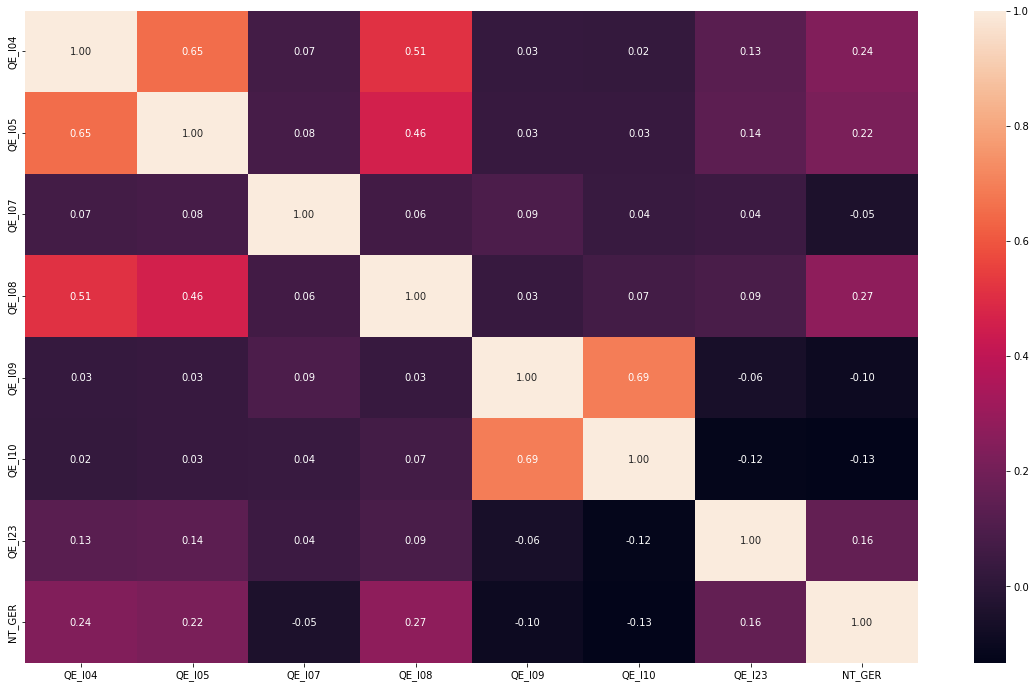

In [39]:
plt.figure(figsize=(20, 12))
sns.heatmap(economia.corr(), annot = True, fmt=".2f")

#### Exportar dados

In [41]:
economia.to_excel(r'D:\UFPR\2º Semestre 2021\Estatística Econômica e Introdução à Econometria\10. Décimo Relatório\economia_variaveis_tratadas.xlsx', header=True, index=False)